In the below cell we combine all the data from all the files. Each column in each file is stacked to the nm column to form a data of shape nx2
Labels are added, all data is considered dead and labled 0, except for data from 2016skin.csv file which is live skin and labeled 1.

In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

fL = './ReadShowLeather/data/Leder.csv'
fH = './ReadShowLeather/data/Holz.csv'
fF = './ReadShowLeather/data/Fleisch.csv'
fS = '2016skin.csv'
fM = '2016material.csv'
fMF = '2016material-fake.csv'

Files = [fL, fH, fF, fM, fMF, fS]
decimals = [',',',',',','.','.','.']
Y_values= [0,0,0,0,0,1]

data = np.zeros((1,3))
for i, f in enumerate(Files):
    df = pd.read_csv(f, delimiter=';',decimal=decimals[i], index_col=0)
    df = df.dropna()
    for col in df.columns:
        Y=np.ones((len(df[col]),1))*Y_values[i]
        X1=df.index.to_numpy().reshape((-1,1))
        X2=df[col].to_numpy().reshape((-1,1))
        d=np.hstack((X1,X2,Y))
        data = np.vstack((data,d))
np.random.shuffle(data)
data = np.delete(data, 0, 0)

X= data[:,:2].reshape((-1,2))
Y= data[:,2]



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30
building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30
building tree 18 of 30building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30
building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:   25.8s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   34.4s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  23 out of  30 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  30 out of  30 | elapsed:    0.5s finished


RFC Accuracy: 0.9406811817967707


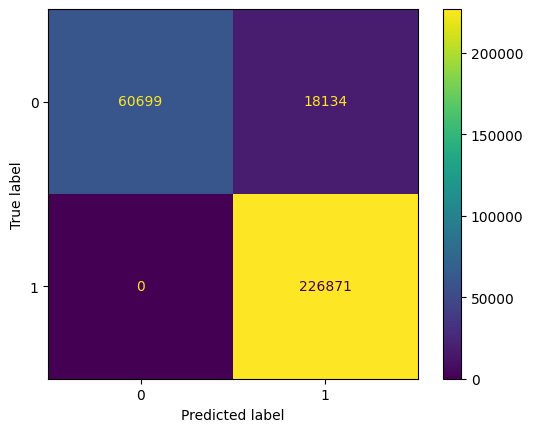

In [14]:
# Load and preprocess your data (X_train, y_train, X_test, y_test)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, train_size=0.8)

#We add a weight to the classes to prioritize precision in favor of class 1 
class_weights = {0:1, 1:55}
rfc_model = RFC(n_estimators=30,max_depth=40,min_samples_leaf=10,min_samples_split=10,n_jobs=-1,class_weight=class_weights,verbose=2, random_state=0)

# Train the model
rfc_model.fit(X_train, y_train)

#We adjust the decision threshold to make the model more conservative in predicting class 0. By lowering the threshold, you require a much higher level of confidence for a sample to be classified as class 0, reducing the risk of false negatives.
threshold = 0.01  # Adjust the threshold as needed
y_pred_prob = rfc_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_prob > threshold).astype(int)


accuracy_rfc = accuracy_score(y_test, y_pred)
print("RFC Accuracy:", accuracy_rfc)

cm_rfc = confusion_matrix(y_test, y_pred)
disp_rfc = ConfusionMatrixDisplay(cm_rfc)
disp_rfc.plot()


In [17]:
disp_rfc.figure_.savefig("./Img/RFC_FinalResult0_18k.png")